In [80]:
import pandas as pd
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import os

In [81]:
lenzerheide_file = tf.keras.utils.get_file('data_lenzerheide.csv', 'https://docs.google.com/spreadsheets/d/1cFjr92P5wtk1wepvWG4DLtw_fvb0WQSUdOXe6HrzmRQ/gviz/tq?tqx=out:csv&sheet=input+dataset_lenzerheide')

In [82]:
df_1 = pd.read_csv(lenzerheide_file)
d_datetime = df_1
d_datetime['Datum'] = pd.to_datetime(df_1['Datum'],format='%d.%m.%Y')
end_date = pd.to_datetime('31.12.2018',format='%d.%m.%Y')
d_datetime = d_datetime.loc[d_datetime['Datum']<=end_date]

In [83]:
einsatze = pd.read_csv('..\data\hystoric_schedule\man_months_cleaned.csv',header=None,names=('Datum','Value'))
einsatze.tail()

,Datum,Value
1091,2018-12-27 00:00:00,3.0
1092,2018-12-28 00:00:00,3.0
1093,2018-12-29 00:00:00,3.0
1094,2018-12-30 00:00:00,2.0
1095,2018-12-31 00:00:00,0.0


In [84]:
einsatze = einsatze.loc[(d_datetime['Total Anfragen']!=0)]
d_datetime = d_datetime.loc[(d_datetime['Total Anfragen']!=0)]

In [85]:
einsatze['Value'] = einsatze['Value'].ewm(span=5).mean()

In [86]:
#einsatze['Value']=(einsatze['Value']-einsatze['Value'].mean())/einsatze['Value'].std()
#d_datetime.loc['Total Anfragen']=(d_datetime['Total Anfragen']-d_datetime['Total Anfragen'].mean())/d_datetime['Total Anfragen'].std()

Text(0.5, 1.0, 'Anfragen vs Mantage')

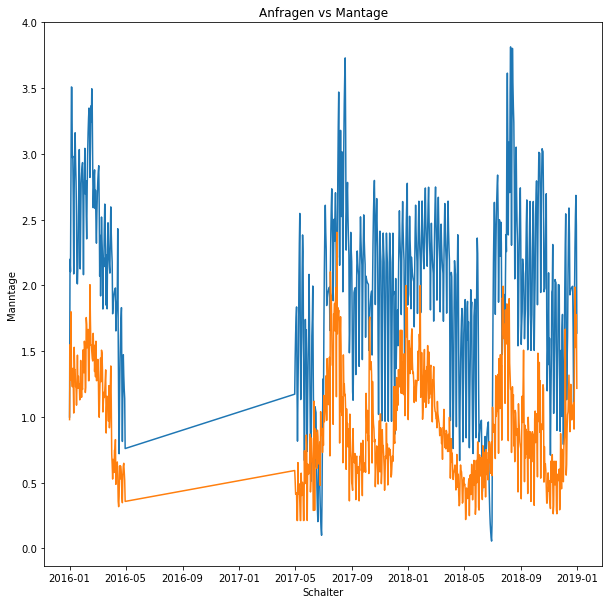

In [90]:
width = 10
height = 10
plt.figure(figsize=(width, height))


#plt.scatter(d_datetime['Total Anfragen'], einsatze['Value'])
plt.plot(d_datetime['Datum'],einsatze['Value'])
plt.plot(d_datetime['Datum'],d_datetime['Total Anfragen']/100)
#plt.plot(t,d_datetime['Total Anfragen'])


plt.xlabel('Schalter')
plt.ylabel('Manntage')
#plt.ylabel('Schalter Anzahl')
#plt.legend(('Prediction','Last Year'), loc='upper center')
plt.title('Anfragen vs Mantage')